In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/mon.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 특징(X)과 레이블(y) 분리
X = data.iloc[:, :-1]  # 특징 (feature)들
y = data.iloc[:, -1]   # 레이블 (0~94)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
데이터 샘플:
   Total Packets  Incoming Packets  Outgoing Packets  Incoming Ratio  \
0         1421.0             121.0            1300.0        0.085151   
1          518.0              80.0             438.0        0.154440   
2         1358.0             118.0            1240.0        0.086892   
3         1446.0             122.0            1324.0        0.084371   
4         1406.0             115.0            1291.0        0.081792   

   Outgoing Ratio  Outgoing Std  Outgoing Mean  Packets per Second  \
0        0.914849    515.483953     773.322314          140.138067   
1        0.845560    139.231951     226.162500           50.984252   
2        0.913108    472.735508     786.110169          122.232223   
3        0.915629    513.916038     820.139344          108.233533   
4        0.918208    503.993490     789.608696          132.142857   

   First 

**튜닝을 하지 않은 기본 decision tree model**

In [ ]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.6387


**튜닝을 진행한 decision tree model**

Fitting 5 folds for each of 72 candidates, totalling 360 fits
최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 0.6621

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        42
           1       0.59      0.48      0.53        42
           2       0.73      0.86      0.79        35
           3       0.53      0.62      0.57        29
           4       0.60      0.74      0.67        39
           5       0.71      0.76      0.73        45
           6       0.77      0.77      0.77        44
           7       0.64      0.64      0.64        36
           8       0.73      0.65      0.69        34
           9       0.54      0.61      0.58        31
          10       0.73      0.68      0.70        47
          11       0.54      0.63      0.58        35
          12       0.82      0.74      0.78        42
          13       0.43      0.50    

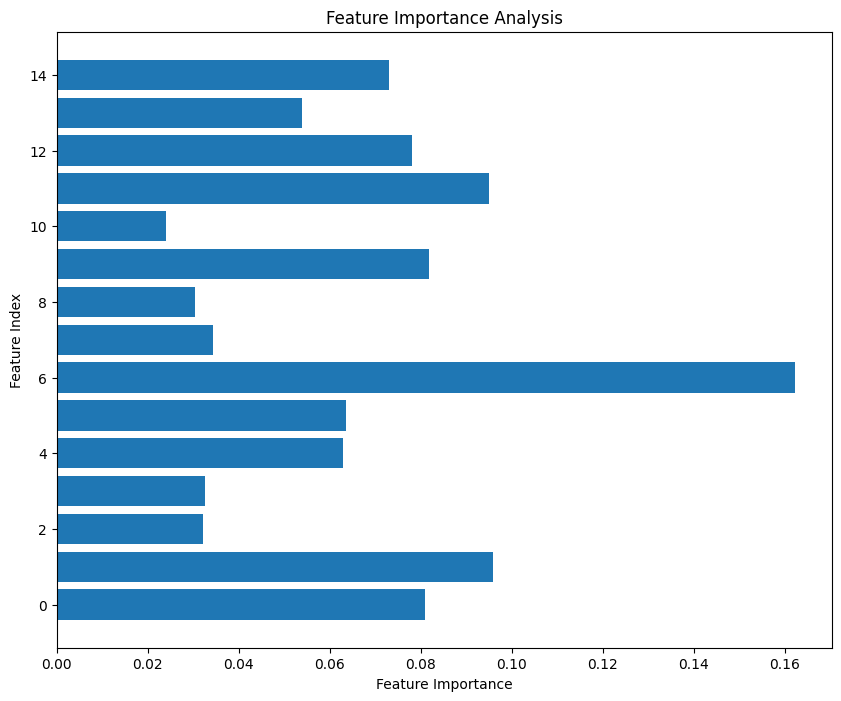

In [ ]:
#라이브러리 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV를 통한 최적의 파라미터 탐색
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 튜닝한 모델로 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = best_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 14. Feature Importance 시각화
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance Analysis')
plt.show()